In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

imagem = cv2.imread('/content/sample_data/this.jpg')


raio_foveal = 400  # O raio da área central de alta qualidade
escala_qualidade = 20  # Fator de escala para a qualidade nas áreas periféricas

altura, largura, _ = imagem.shape

mapa_calor = np.zeros((altura, largura), dtype=np.float32)

y_centro, x_centro = altura // 2, largura // 2
cv2.circle(mapa_calor, (x_centro, y_centro), raio_foveal, 1, -1)

mapa_calor = cv2.GaussianBlur(mapa_calor, (0, 0), raio_foveal / 3)
mapa_calor = cv2.normalize(mapa_calor, None, 0, 1, cv2.NORM_MINMAX)

imagem_saida = np.zeros_like(imagem)
for c in range(3):
    imagem_saida[:, :, c] = imagem[:, :, c] * mapa_calor

In [ ]:
def original_images(img1, img2):
    f, axarr = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
    plt.sca(axarr[0]);
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2BGRA)); plt.title('Imagem Original')
    plt.sca(axarr[1]);
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2BGRA)); plt.title('Imagem Foveat')
    plt.show()

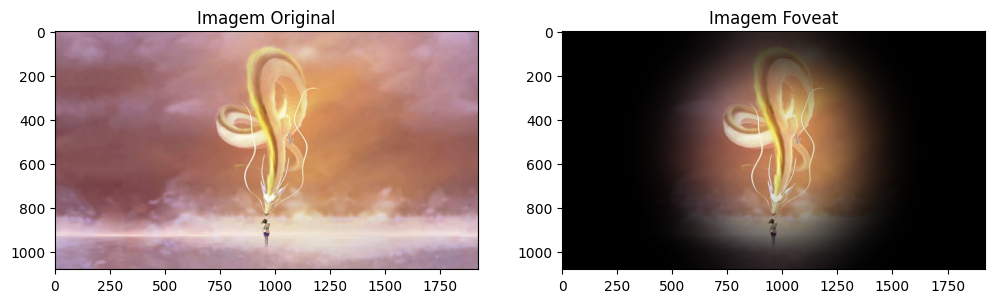

In [ ]:
original_images(imagem, imagem_saida);